In [93]:
import numpy as np
from scipy . optimize import minimize
from scipy import linalg
import matplotlib . pyplot as plt
%matplotlib inline

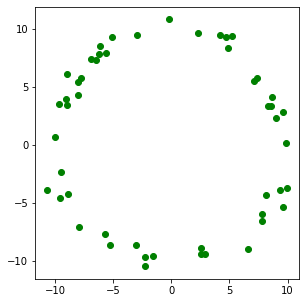

In [94]:
# np . random . seed ( 0 )
N = 100
half_n = N// 2
r = 10
s = r /16
t = np.random.uniform(0, 2*np.pi, half_n )

n = s*np.random.randn(half_n)
x, y = (r+n)*np.cos(t),(r+n)*np.sin(t)

X_circ = np.hstack((x.reshape(half_n,1), y.reshape(half_n, 1)))


# m, b = -1, 2
# x = np.linspace(-12, 12, half_n)
# y = m*x + b + s*np.random.randn(half_n)
# X_line = np.hstack((x.reshape(half_n,1) , y.reshape(half_n,1)))

# X = np.vstack((X_circ , X_line))

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
ax.plot(x,y,'o',color='green')
ax.set_aspect('equal')

plt.show()


In [95]:
total_points = len(x)
print(total_points)

50


In [96]:
p = 0.99
s = 3
e = 0.5
N = int(np.ceil(np.log(1-p)/np.log(1-((1-e)**s))))
print(N)

35


In [97]:
def findCircle(x1, y1, x2, y2, x3, y3) :
	B = (x1**2 + y1**2)*(y2-y3) + (x2**2+y2**2)*(y3-y1) + (x3**2 + y3**2)*(y1-y2)
	A = x1*(y2-y3) - y1*(x2-x3) + x2*y3 - x3*y2
	C = (x1**2 + y1**2)*(x2-x3) + (x2**2 + y2**2)*(x3-x1) + (x3**2 + y3**2)*(x1-x2)
	D = (x1**2 + y1**2)*(x3*y2-x2*y3) + (x2**2 + y2**2)*(x1*y3-x3*y1) + (x3**2+y3**2)*(x2*y1 - x1*y2)
	
	H = B/(2*A)
	K = -C/(2*A)
	R = np.sqrt((B**2 + C**2 - 4*A*D)/(4*(A**2)))
	L = [H,K,R]


	return L




In [98]:
findCircle(1,1,2,4,5,3)


[3.0, 2.0, 2.23606797749979]

In [99]:
def drawCircle(x0,y0,r,PX,PY):
    theta = np.linspace(0, 2*np.pi,360)
    xx , yy = x0 + r*np.cos(theta) , y0 + r*np.sin(theta)
    
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot()
    ax.plot(xx,yy,color='green')
    ax.plot(x,y,'o')
    ax.plot(PX,PY,'o',color = 'red')
    

    ax.set_aspect('equal')
    ax.grid('on')
    plt.show()


In [100]:
def random3(n):
    a,b,c = np.random.randint(n,size=3)
    if a==b or b==c or a==c:
        return random3(n)
    else:
        return a,b,c

In [101]:
def pointToCircle(hh,kk,r,x11,y11):
    return (np.abs(np.sqrt((x11-hh)**2+(y11-kk)**2)-r))

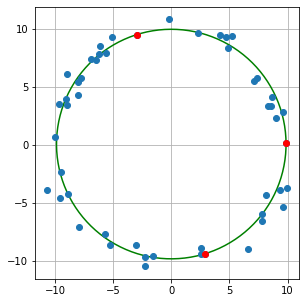

47


In [102]:
ransac = []
max_inliers = 0
inlier_set = []

for i in range(total_points):
    
    point1, point2, point3 = random3(total_points)
    inliers = 0
    
    center_x, center_y, radius = findCircle(x[point1],y[point1],x[point2],y[point2],x[point3],y[point3])
    
    inlier_set = []
    for j in range(total_points):
        d = pointToCircle(center_x,center_y,radius,x[j],y[j])
        if d<1:
            inliers+=1
            inlier_set.append([x[j],y[j]])

    
    outliers = total_points - inliers
    
    if inliers > max_inliers:
        ransac = [point1,point2,point3]
        max_inliers = inliers
        ransac_center_x, ransac_center_y, ransac_radius = center_x, center_y, radius
        ransac_set = inlier_set
        
drawCircle(ransac_center_x,ransac_center_y,ransac_radius,[x[ransac[0]],x[ransac[1]],x[ransac[2]]],[y[ransac[0]],y[ransac[1]],y[ransac[2]]])
print(max_inliers)


In [103]:
print(len(ransac_set))

47


47


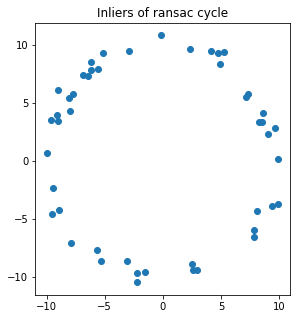

In [104]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
ransac_x = []
ransac_y = []
for h in ransac_set:
    ransac_x.append(h[0])
    ransac_y.append(h[1])

ax.plot(ransac_x,ransac_y,'o')
print(len(ransac_x))
ax.set_aspect('equal')
plt.title("Inliers of ransac cycle")
plt.show()


In [105]:
total_points = len(ransac_set)


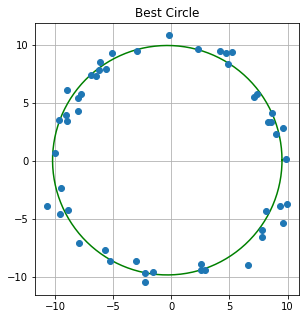

In [109]:
best = []
max_inliers = 0

for i in range(total_points):
    
    point1, point2, point3 = random3(total_points)
    inliers = 0
    
    center_x, center_y, radius = findCircle(ransac_x[point1],ransac_y[point1],ransac_x[point2],ransac_y[point2],ransac_x[point3],ransac_y[point3])
    
    for j in range(total_points):
        d = pointToCircle(center_x,center_y,radius,ransac_x[j],ransac_y[j])
        if d<1:
            inliers+=1

    if inliers > max_inliers:
        best = [point1,point2,point3]
        max_inliers = inliers
        best_center_x, best_center_y, best_radius = center_x, center_y, radius
        

theta = np.linspace(0,2*np.pi,360)
xx , yy = best_center_x + best_radius*np.cos(theta) , best_center_y + best_radius*np.sin(theta)


fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
ax.plot(xx,yy,color='green')
ax.plot(x,y,'o')

ax.set_aspect('equal')
ax.grid('on')
plt.title("Best Circle")
plt.show()

